In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv("../data/lemmatized_sentences.csv", header=None, names=["Items in order"])

In [3]:
df

,Items in order
0,x grilled chicken jamaican tender x grilled ch...
1,x grilled chicken smoky bbq tender x fried chi...
2,x grilled chicken smoky bbq tender x grilled c...
3,x bone in jamaican grilled chicken quarter ang...
4,x fried chicken angara tender x grilled chicke...
...,...
101,x bone in smoky bbq grilled chicken x fried ch...
102,x bone in jamaican grilled chicken quarter ang...
103,x grilled chicken smoky bbq tender
104,x animal fry x bone in jamaican grilled chicken


In [4]:

def zipf_analysis(text_column, num_words=50):
    # Geçersiz ve boş değerleri temizle
    cleaned_texts = text_column.dropna().astype(str)

    if cleaned_texts.empty:
        print("Uyarı: Metin verisi boş. Analiz yapılamaz.")
        return

    # Metinleri birleştir ve temizle
    text = ' '.join(cleaned_texts).lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenizasyon
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]

    if not tokens:
        print("Uyarı: Temizleme sonrası analiz yapılacak kelime kalmadı.")
        return

    # Kelime sıklığı
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)

    # Sıra ve sıklık verileri
    ranks = np.arange(1, len(most_common_words) + 1)
    frequencies = [count for word, count in most_common_words]

    # Grafik
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='o')
    plt.xlabel('Kelime Sırası (log)')
    plt.ylabel('Kelime Sıklığı (log)')
    plt.title('Zipf Yasası Analizi (lemmatized_sentences)')
    plt.grid(True)
    plt.show()

    # Bilgi çıktısı
    print(f"Toplam kelime sayısı: {len(tokens)}")
    print(f"Farklı kelime sayısı: {len(word_counts)}")

    if len(tokens) < 10000:
        print("Veri seti küçük. Zipf analizi sınırlı genellenebilir.")
    else:
        print("Veri seti yeterli büyüklükte.")

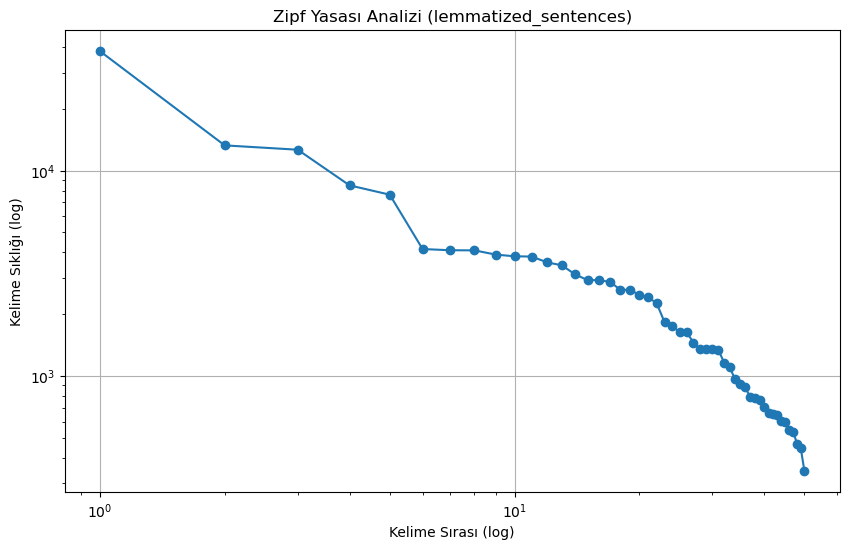

Toplam kelime sayısı: 171906
Farklı kelime sayısı: 150
Veri seti yeterli büyüklükte.


In [5]:
df = pd.read_csv("../data/lemmatized_sentences.csv", header=None, names=["Items in order"])
zipf_analysis(df["Items in order"])